
Running K-Means for K=2 ...


C:\Users\latha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1972: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2560 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Saved quantized_K2.png → C:/Users/latha/SEM6/DIP/EXP1/quantized_output\quantized_K2.png

Running K-Means for K=8 ...


C:\Users\latha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1972: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2560 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


Saved quantized_K8.png → C:/Users/latha/SEM6/DIP/EXP1/quantized_output\quantized_K8.png


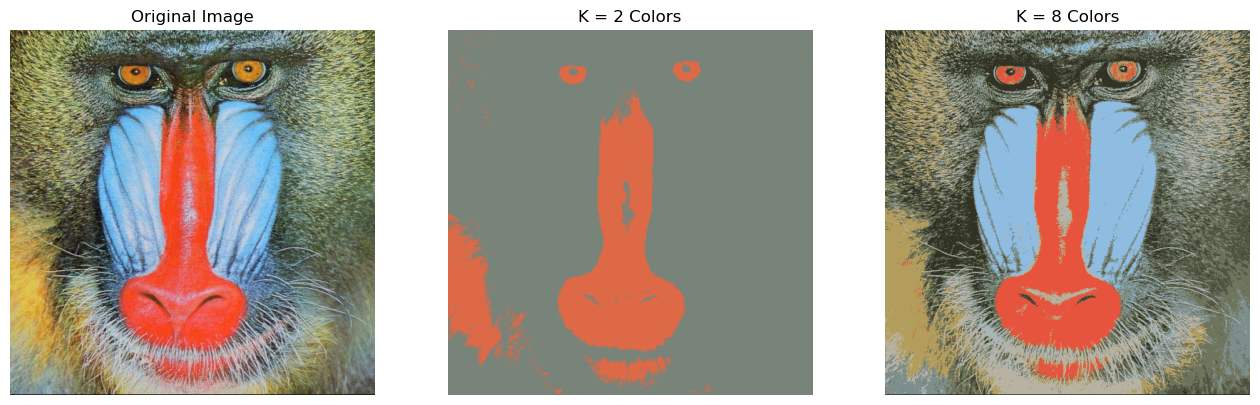

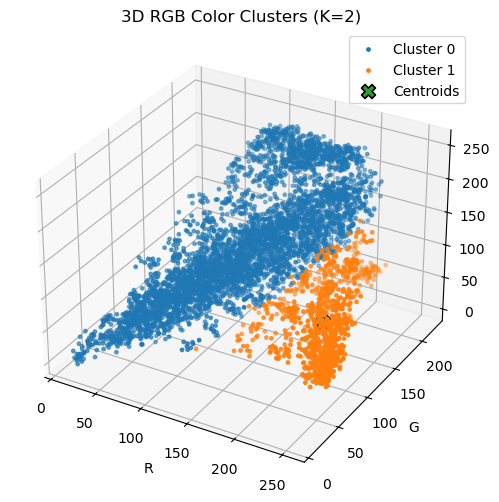

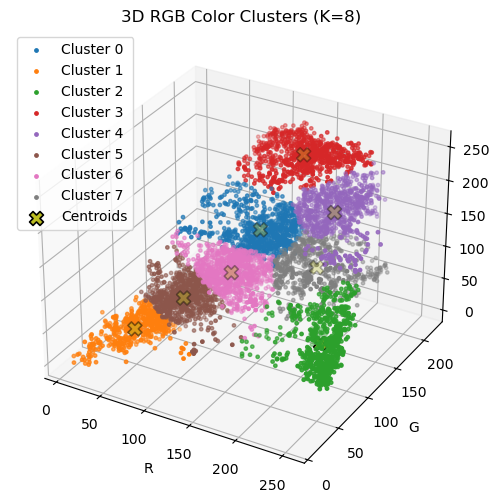

In [18]:
from PIL import Image
import numpy as np
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os

# --------------------------------------------------------
# USER PATHS  
# --------------------------------------------------------
input_path = r"C:/Users/latha/SEM6/DIP/EXP1/test_image/Plain-Baboon-Image-Figure-7-Ciphered-Baboon-Image.jpg"
save_dir = r"C:/Users/latha/SEM6/DIP/EXP1/quantized_output"

os.makedirs(save_dir, exist_ok=True)

# --------------------------------------------------------
# LOAD IMAGE
# --------------------------------------------------------
img = Image.open(input_path).convert("RGB")
img_np = np.array(img)       # full resolution


img_small = img_np     # using full resolution


# --------------------------------------------------------
# K-MEANS QUANTIZATION FUNCTION
# --------------------------------------------------------
def quantize_kmeans(image, K):
    h, w, c = image.shape
    pixels = image.reshape((-1, 3))

    print(f"\nRunning K-Means for K={K} ...")
    kmeans = MiniBatchKMeans(n_clusters=K, random_state=42)  # FIXED name
    labels = kmeans.fit_predict(pixels)
    centers = kmeans.cluster_centers_.astype(np.uint8)

    quantized = centers[labels].reshape((h, w, 3))
    return quantized, labels, centers


# --------------------------------------------------------
# RUN FOR K = 2 AND K = 8
# --------------------------------------------------------
Ks = [2, 8]
results = {}

for K in Ks:
    qimg, labels, centers = quantize_kmeans(img_small, K)
    results[K] = (qimg, labels, centers)

    out_img = Image.fromarray(qimg)
    out_path = os.path.join(save_dir, f"quantized_K{K}.png")
    out_img.save(out_path)

    print(f"Saved quantized_K{K}.png → {out_path}")


# --------------------------------------------------------
# SIDE-BY-SIDE IMAGE DISPLAY
# --------------------------------------------------------
plt.figure(figsize=(16, 6))

plt.subplot(1, 3, 1)
plt.imshow(img_small)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(results[2][0])
plt.title("K = 2 Colors")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(results[8][0])
plt.title("K = 8 Colors")
plt.axis("off")

plt.show()


# --------------------------------------------------------
# RGB 3D SCATTER PLOT FUNCTION
# --------------------------------------------------------
def plot_3d_rgb(image, labels, centers, K):
    pixels = image.reshape((-1, 3))

    # sample for readability
    idx = np.random.choice(len(pixels), size=min(6000, len(pixels)), replace=False)
    sample_pixels = pixels[idx]
    sample_labels = labels[idx]

    fig = plt.figure(figsize=(7, 6))
    ax = fig.add_subplot(111, projection='3d')

    for cluster in range(K):
        pts = sample_pixels[sample_labels == cluster]
        ax.scatter(pts[:, 0], pts[:, 1], pts[:, 2], s=6, label=f"Cluster {cluster}")

    # plot cluster centers
    ax.scatter(
        centers[:, 0], centers[:, 1], centers[:, 2],
        s=100, marker='X', edgecolors='black', linewidths=1.2, label="Centroids"
    )

    ax.set_xlabel("R")
    ax.set_ylabel("G")
    ax.set_zlabel("B")
    ax.set_title(f"3D RGB Color Clusters (K={K})")
    ax.legend()
    plt.show()


# --------------------------------------------------------
# PLOT 3D CLUSTERS FOR K=2 AND K=8
# --------------------------------------------------------
for K in Ks:
    qimg, labels, centers = results[K]
    plot_3d_rgb(img_small, labels, centers, K)
